# Construção de um gráfico em papel milimetrado

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, FixedLocator

## Construindo o papel com as dimensões vertical e horizontal em milímetros

In [2]:
v = 280
h = 180

div_v = range(0, v+1, 10)
div_h = range(0, h+1, 10)

Construindo o papel milimetrado

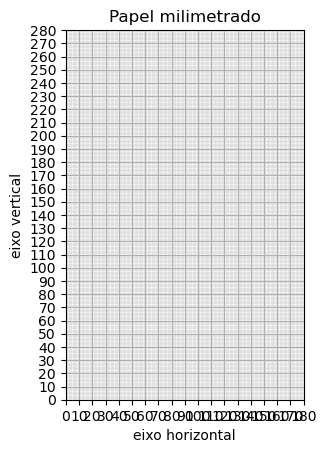

In [77]:
fig, ax = plt.subplots()


ax.set_aspect(1)


ax.set_title('Papel milimetrado')
ax.set_xlabel('eixo horizontal')
ax.set_ylabel('eixo vertical')

ax.set_xlim(div_h[0],div_h[-1])
ax.set_ylim(div_v[0],div_v[-1])

# grid lines
ax.grid(which = "major")
ax.grid(which = "minor", alpha = 0.2)
ax.set_axisbelow(True)

ax.tick_params(which = "minor", bottom = False, left = False)

#  major grid do eixo horizontal
ax.xaxis.set_major_locator(FixedLocator(div_h))

#  major grid do eixo vertical
ax.yaxis.set_major_locator(FixedLocator(div_v))

# Minor grid dividindo o major grid em 10
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))


## Criando um conjunto de dados de exemplo

Função para arredondar para 1 algarismo significativo

In [71]:
from math import log10, floor

def round_it(x, sig):
    return round(x, sig - int(floor(log10(abs(x)))) - 1)

In [156]:
x = np.array([1.25, 17.37, 21, 34.50, 48.92])
y = 7*x+120
y_err = [round_it(0.01*y[i],1) for i in range(len(y))]


## Cálculo da melhor escala

Cálculo da escala natural:

In [157]:
delta_x = x.max()-x.min()
delta_y = (y+y_err).max()-(y-y_err).min()
delta_y

339.69

In [158]:
escala_natural_x = delta_x/h
escala_natural_y = delta_y/v
escala_natural_y

1.2131785714285714

Cálculo da melhor escala: arredondar a escala natural para cima fazendo com que o primeiro algarismo significativo seja 1, 2 ou 5.

In [159]:
from decimal import Decimal

def fexp(number):
    (sign, digits, exponent) = Decimal(number).as_tuple()
    return len(digits) + exponent - 1

def fman(number):
    return float(Decimal(number).scaleb(-fexp(number)).normalize())

def escala_boa(num):
    exp = fexp(num)
    if fman(num) / 5 == 1 or fman(num) / 2 == 1 or fman(num) == 1:
        return num
    if fman(num) / 5 > 1:
        return 10*10**exp
    if fman(num) / 2 > 1:
        return 5*10**exp
    if fman(num) > 1:
        return 2*10**exp
    return 10**exp


In [160]:
escala_x = escala_boa(escala_natural_x)
escala_y = escala_boa(escala_natural_y)
escala_y

2

In [161]:
delta_bom_x = h*escala_x
delta_bom_y = v*escala_y
delta_bom_y

560

In [162]:
sobra_x = delta_bom_x-delta_x
sobra_y = delta_bom_y-delta_y
sobra_y

220.31

In [178]:
lim_x = [x.min()-sobra_x/2, x.max()+sobra_x/2]
lim_y = [y.min()-sobra_y/2, y.max()+sobra_y/2]
lim_y

[18.595, 572.595]

In [179]:
def limite_bom(esc, num):
    if num % fman(esc) == 0:
        #print('A')
        return num
    if fman(esc) == 5 :
        #print('B')
        return round(max (round(num + 5 - (num % 5)) , round(num - (num % 5)) ))
    if fman(esc) == 2 :
        #print('C')
        return round(max (round(num + 2 - (num % 2)) , round(num - (num % 2)) ))

In [184]:
div_x = [limite_bom(escala_x, lim_x[1])-escala_x*h+escala_x*10*i for i in range(0,int(h/10+1))]
div_y = [limite_bom(escala_y, lim_y[1])-escala_y*v+escala_y*10*i for i in range(0,int(v/10+1))]


Convertendo a escala de x para mm 

In [185]:
x_mm = (x-div_x[0]) / escala_x
y_mm = (y-div_y[0]) / escala_y

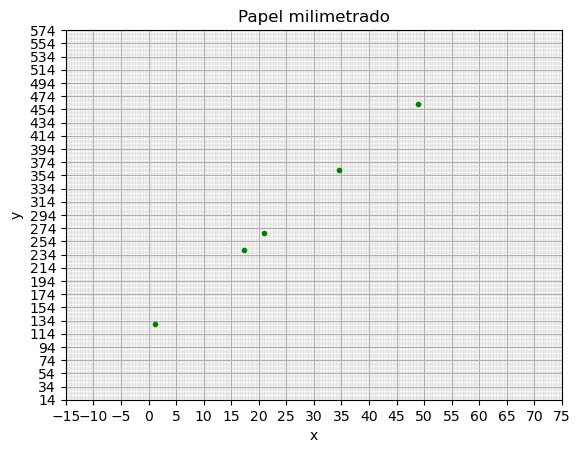

In [186]:
fig, ax = plt.subplots()

ax.set_title('Papel milimetrado')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xlim(div_x[0],div_x[-1])
ax.set_ylim(div_y[0],div_y[-1])

# grid lines
ax.grid(which = "major")
ax.grid(which = "minor", alpha = 0.2)
ax.set_axisbelow(True)

ax.tick_params(which = "minor", bottom = False, left = False)

#  major grid do eixo horizontal
ax.xaxis.set_major_locator(FixedLocator(div_x))

#  major grid do eixo vertical
ax.yaxis.set_major_locator(FixedLocator(div_y))

# Minor grid dividindo o major grid em 10
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))

# plot
ax.scatter(
    x,
    y,
    marker='.',
    color='green',
    label='dados experimentais',
)


In [168]:
x_mm

array([ 32.5 ,  64.74,  72.  ,  99.  , 127.84])

In [169]:
y_mm

array([ 57.375, 113.795, 126.5  , 173.75 , 224.22 ])